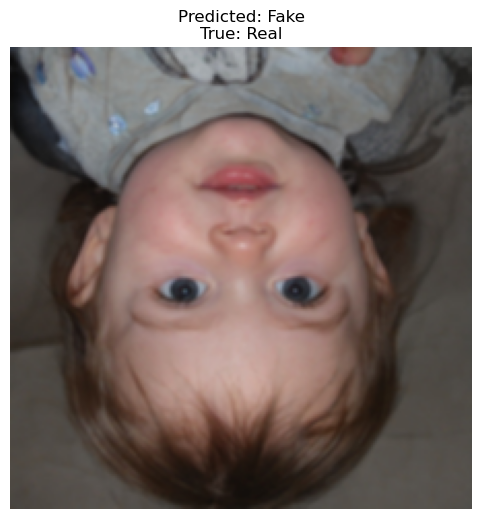

Image: 0.jpg
Predicted class: Fake
True class: Real
Confidence score: 1.00



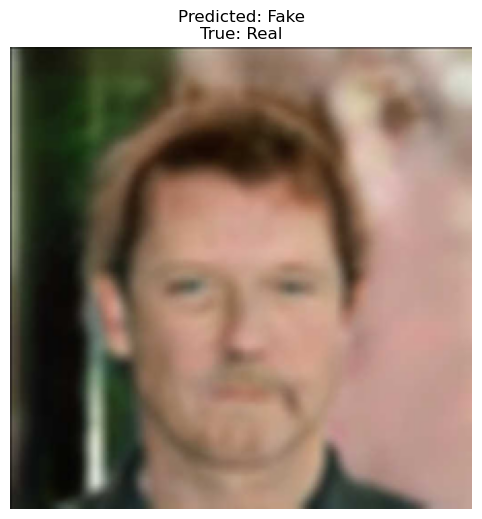

Image: 1.jpg
Predicted class: Fake
True class: Real
Confidence score: 1.00



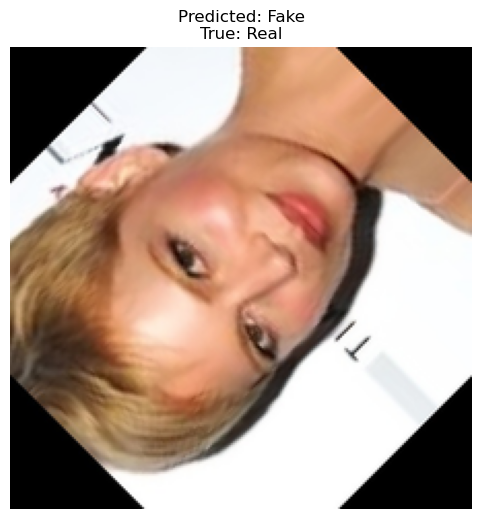

Image: 10.jpg
Predicted class: Fake
True class: Real
Confidence score: 1.00



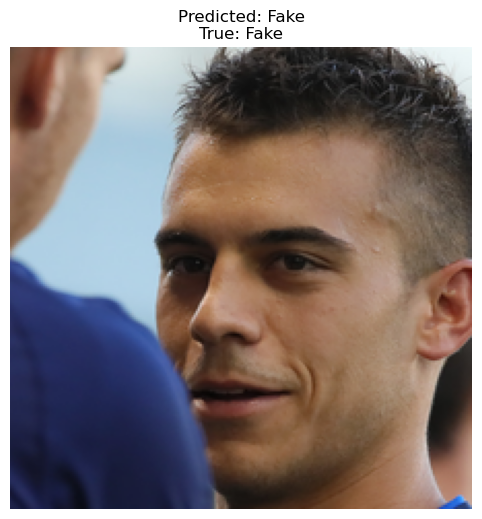

Image: 2.jpg
Predicted class: Fake
True class: Fake
Confidence score: 1.00



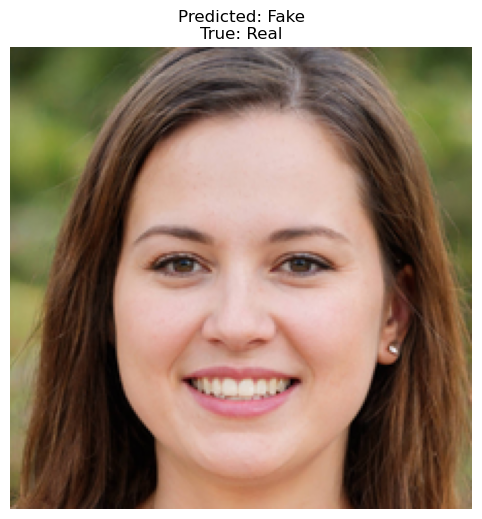

Image: 3.jpg
Predicted class: Fake
True class: Real
Confidence score: 0.58



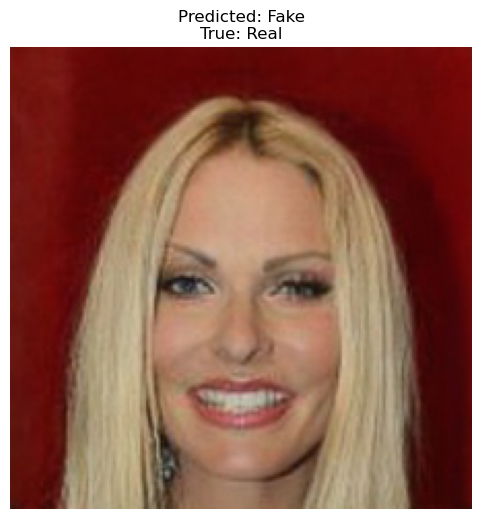

Image: 4.jpg
Predicted class: Fake
True class: Real
Confidence score: 1.00



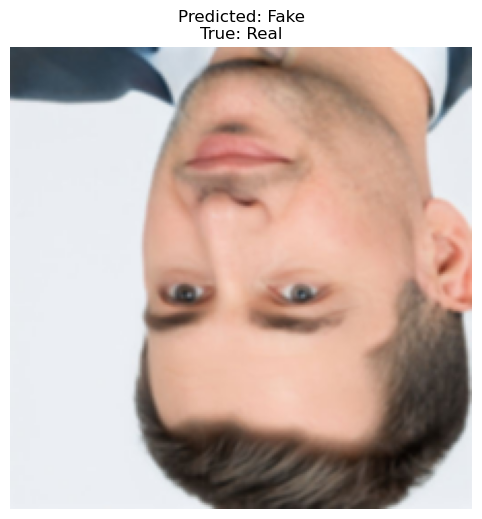

Image: 5.jpg
Predicted class: Fake
True class: Real
Confidence score: 1.00



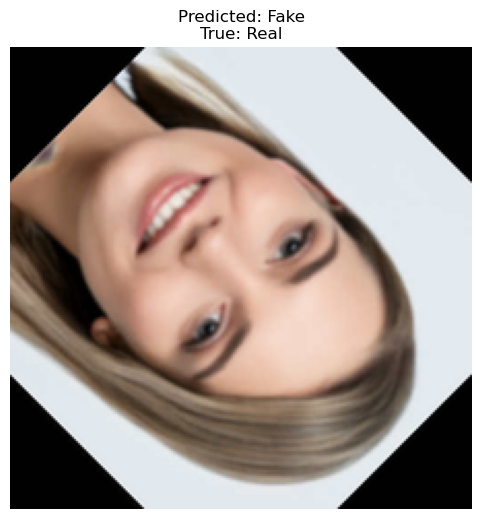

Image: 6.jpg
Predicted class: Fake
True class: Real
Confidence score: 1.00



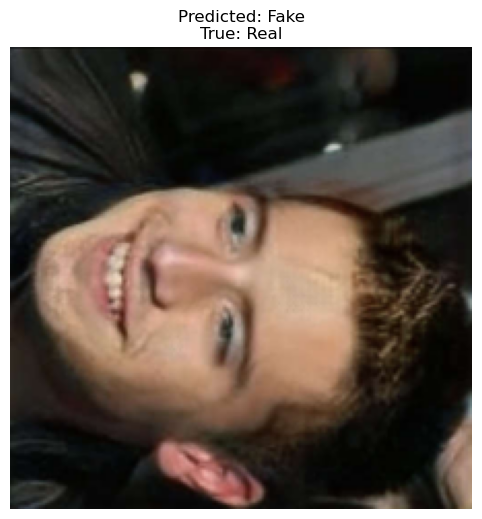

Image: 7.jpg
Predicted class: Fake
True class: Real
Confidence score: 1.00



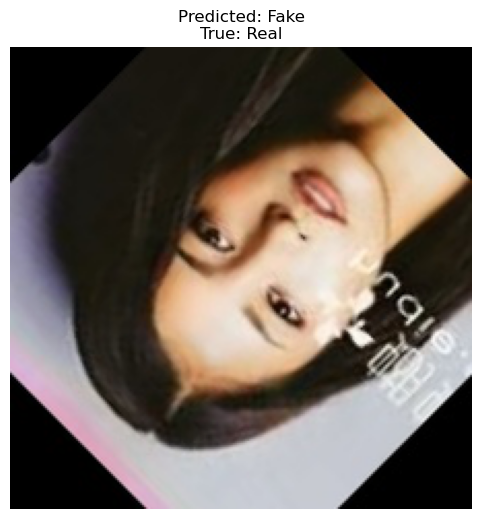

Image: 8.jpg
Predicted class: Fake
True class: Real
Confidence score: 1.00



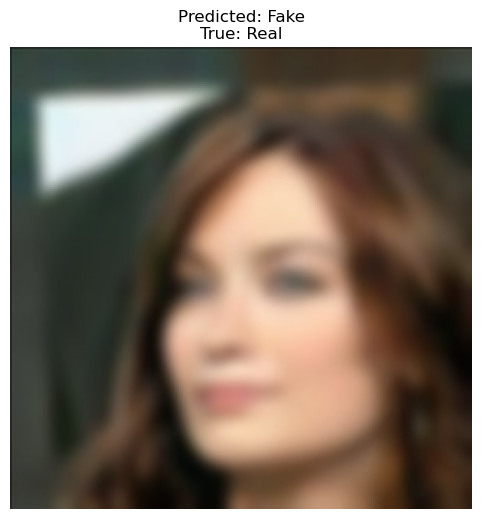

Image: 9.jpg
Predicted class: Fake
True class: Real
Confidence score: 1.00


Overall Metrics:
Accuracy: 90.91%

Detailed Classification Report:
              precision    recall  f1-score   support

        Fake       0.00      0.00      0.00         1
        Real       0.91      1.00      0.95        10

    accuracy                           0.91        11
   macro avg       0.45      0.50      0.48        11
weighted avg       0.83      0.91      0.87        11



c:\Users\Aden\anaconda3\envs\deepfake\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Aden\anaconda3\envs\deepfake\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Aden\anaconda3\envs\deepfake\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:


# With this new code:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import accuracy_score, classification_report

# Load the model and labels
model = load_model('deepfakemodel.h5', compile=False)
class_names = open('labels.txt', 'r').readlines()

# Load the ground truth labels from label-task1.txt
label_dict = {}
label_file_path = r"C:\Users\Aden\Desktop\Deepfakes\deepfake testing\label-task1.txt"  # Update this path to match your file location
with open(label_file_path, 'r') as f:
    for line in f:
        if line.strip():  # Skip empty lines
            parts = line.strip().split()
            if len(parts) >= 2:
                image_name = parts[0]
                label = int(parts[1])
                label_dict[image_name] = label

# Directory containing the test images
test_dir = r"C:\Users\Aden\Desktop\Deepfakes\test-10"  # Replace with your test images path

predictions = []
true_labels = []

# Process each image in the directory
for image_name in os.listdir(test_dir):
    if image_name.endswith(('.jpg', '.jpeg', '.png')):
        # Get true label
        if image_name in label_dict:
            true_label = label_dict[image_name]
            true_labels.append(true_label)
            
            # Prepare and process image
            data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
            image = Image.open(os.path.join(test_dir, image_name)).convert('RGB')
            size = (224, 224)
            image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
            image_array = np.asarray(image)
            normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
            data[0] = normalized_image_array

            # Predict
            prediction = model.predict(data, verbose=0)
            index = np.argmax(prediction)
            predictions.append(index)
            
            # Optional: Display image and prediction
            plt.figure(figsize=(8, 6))
            plt.imshow(image)
            plt.title(f'Predicted: {class_names[index].strip()}\nTrue: {"Real" if true_label == 1 else "Fake"}')
            plt.axis('off')
            plt.show()
            
            confidence_score = prediction[0][index]
            print(f'Image: {image_name}')
            print(f'Predicted class: {class_names[index].strip()}')
            print(f'True class: {"Real" if true_label == 1 else "Fake"}')
            print(f'Confidence score: {confidence_score:.2f}\n')

# Calculate and display metrics
if predictions and true_labels:
    accuracy = accuracy_score(true_labels, predictions)
    print("\nOverall Metrics:")
    print(f"Accuracy: {accuracy:.2%}")
    print("\nDetailed Classification Report:")
    print(classification_report(true_labels, predictions, 
                              target_names=['Fake', 'Real']))